# Tarea 2 - Introducción a la Biomecánica
### Pregunta 2

In [1]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definición de parámetros

global L
global h
global R
global mu
global lambda_

L = 10
h = 1
R = 10
mu = 1
lambda_ = 10

In [3]:
# Creación de la matriz

B_x = np.linspace(0, L, 250)
B_y = np.linspace(-h / 2, h / 2, 25)

BB_x, BB_y = np.meshgrid(B_x, B_y)

[]

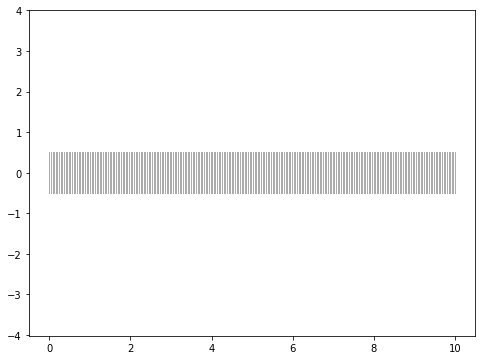

In [4]:
# Ploteo sin deformación

fig = plt.figure(figsize=(8,6))
plt.fill(BB_x, BB_y, color='#ABABAB')
plt.axis('equal')
plt.plot()

In [5]:
# Función de deformación

def phi(x, y):
    xx = (y + R) * np.sin(np.pi * x / L)
    yy = (y - (y + R) * (1 - np.cos(np.pi * x / L)))

    return xx, yy

In [6]:
# Creación de malla deformada

BB_XX, BB_YY = phi(BB_x,BB_y)

[]

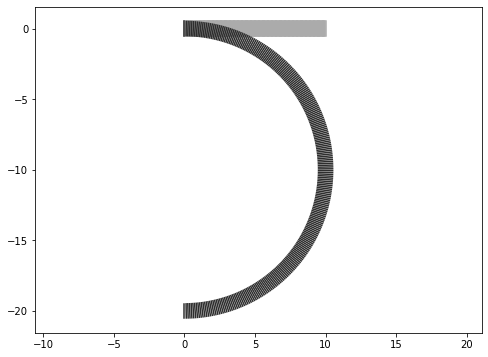

In [7]:
# Ploteo con deformación

fig = plt.figure(figsize=(8,6))
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.plot(BB_XX, BB_YY, color='#2E2E2E')
plt.axis('equal')
plt.plot()

In [8]:
# Definición de tensor gradiente de deformación

F = np.zeros((*BB_x.shape, 2, 2))
F.shape

(25, 250, 2, 2)

In [76]:
P = np.zeros((*BB_x.shape, 2, 2))
P_11 = np.zeros((2, *BB_x.shape))
P_12 = np.zeros((2, *BB_x.shape))
P_21 = np.zeros((2, *BB_x.shape))
P_22 = np.zeros((2, *BB_x.shape))
P_11.shape

(2, 25, 250)

In [83]:
# Cálculo de tensores de deformación

for i in range(len(BB_XX[:, 0])):
    for j in range(len(BB_YY[0, :])):
        local_x = BB_XX[i, j]
        local_y = BB_YY[i, j]
        local_F = np.array([
            [np.pi / L * (local_y + R) * np.cos(np.pi * local_x / L), np.sin(np.pi * local_x / L)],
            [-np.pi / L * (local_y + R) * np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)]
        ])
        
        F[i, j] = local_F

        # Determinante de F
        J = np.pi / L * (local_y + R)
        
        # Logaritmo de J
        try:
            log_J = np.log(J)
        except:
            log_J = 0

        if not (log_J  < 0) and not (log_J > 0):
            log_J = 1
        
        local_P = mu * (local_F - np.linalg.inv(np.transpose(local_F))) + lambda_ * log_J * np.linalg.inv(np.transpose(local_F))

        P[i, j] = local_P
        P_11[0, i, j] = local_P[0, 0]
        P_22[0, i, j] = local_P[1, 1]
        P_12[0, i, j] = local_P[0, 1]
        P_21[0, i, j] = local_P[1, 0]

C:\Users\ivanv\AppData\Local\Temp/ipykernel_21200/2282117689.py:19: RuntimeWarning: invalid value encountered in log
  log_J = np.log(J)


In [75]:
P_11.shape

(2, 25, 250)

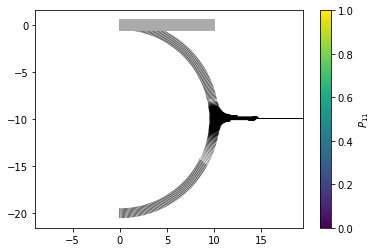

In [84]:
plt.figure()
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.quiver(BB_XX, BB_YY, *P_11, color = 'k')  # * es para desempaquetar
plt.colorbar(label = r'$P_{11}$')
plt.axis('equal')
#plt.xlim(9.5, 10.5)
#plt.ylim(-10.5, -9.5)
plt.show()

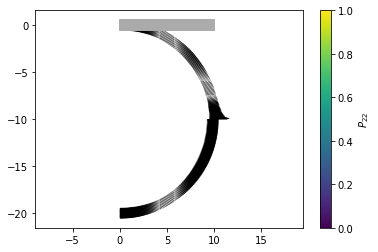

In [85]:
plt.figure()
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.quiver(BB_XX, BB_YY, *P_22, color = 'k')  # * es para desempaquetar
plt.colorbar(label = r'$P_{22}$')
plt.axis('equal')
#plt.xlim(9.5, 10.5)
#plt.ylim(-10.5, -9.5)
plt.show()

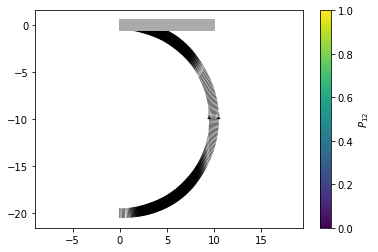

In [86]:
plt.figure()
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.quiver(BB_XX, BB_YY, *P_12, color = 'k')  # * es para desempaquetar
plt.colorbar(label = r'$P_{12}$')
plt.axis('equal')
#plt.xlim(9.5, 10.5)
#plt.ylim(-10.5, -9.5)
plt.show()

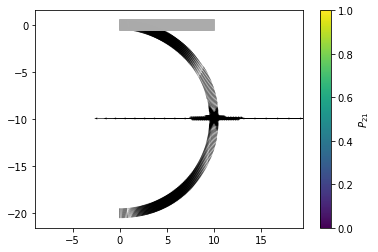

In [87]:
plt.figure()
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.quiver(BB_XX, BB_YY, *P_21, color = 'k')  # * es para desempaquetar
plt.colorbar(label = r'$P_{21}$')
plt.axis('equal')
#plt.xlim(9.5, 10.5)
#plt.ylim(-10.5, -9.5)
plt.show()

#### Hecho con :heart: por Iván Vergara Lam